## Model Selection and Performance on Test Set

In [1]:
import pickle
import bin_class_utils
import general_utils
import time

In [2]:
start = time.time()

In [3]:
TARGET_ATTR = 'label'
VALIDATION_FILE_PATH = "./data/validation_df.csv"
TEST_FILE_PATH = "./data/test_df.csv"
CVS_SCORING_LIST = ['accuracy', 'precision', 'recall', 'f1']

#### Read in best models

In [4]:
best_thresholds = {
    "AdaBoostClassifier": 0.78,
    "DecisionTreeClassifier": 0.86,
    "GradientBoostingClassifier": 0.13,
    "RandomForestClassifier": 0.84,
    "SGDClassifier": 0.53 
}

In [5]:
best_models = dict()
for model_name in best_thresholds.keys():
    best_models[model_name] = pickle.load(open(model_name + ".pkl", 'rb'))

#### Performance comparison on validation set using Bootstrapping

In [6]:
validation_df = general_utils.read_csv(VALIDATION_FILE_PATH)

validation_cap_x_df, validation_y_df = validation_df.drop(columns=TARGET_ATTR), validation_df[[TARGET_ATTR]]
del validation_df


Read CSV file ../data/validation_df.csv into DataFrame:
df.head(): 


,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,...,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d,label
0,1451378,2082,3033,7,154,56,5,11,31,40,...,4,20,-1,-1,7,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,17,5,0
1,1619957,1225,4676,7,178,17,5,17,70,39,...,4,20,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,36,6,0
2,1698084,2206,2822,7,177,56,5,14,31,40,...,5,20,1,-1,2,-1,-1,17,3,0
3,1983802,5103,2564,7,151,60,4,12,23,26,...,4,20,-1,-1,8,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,39,5,0
4,1537560,1098,1732,7,134,55,4,17,65,18,...,4,20,-1,-1,2,3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20...,12,14,1,0


df.shape: (167629, 36)


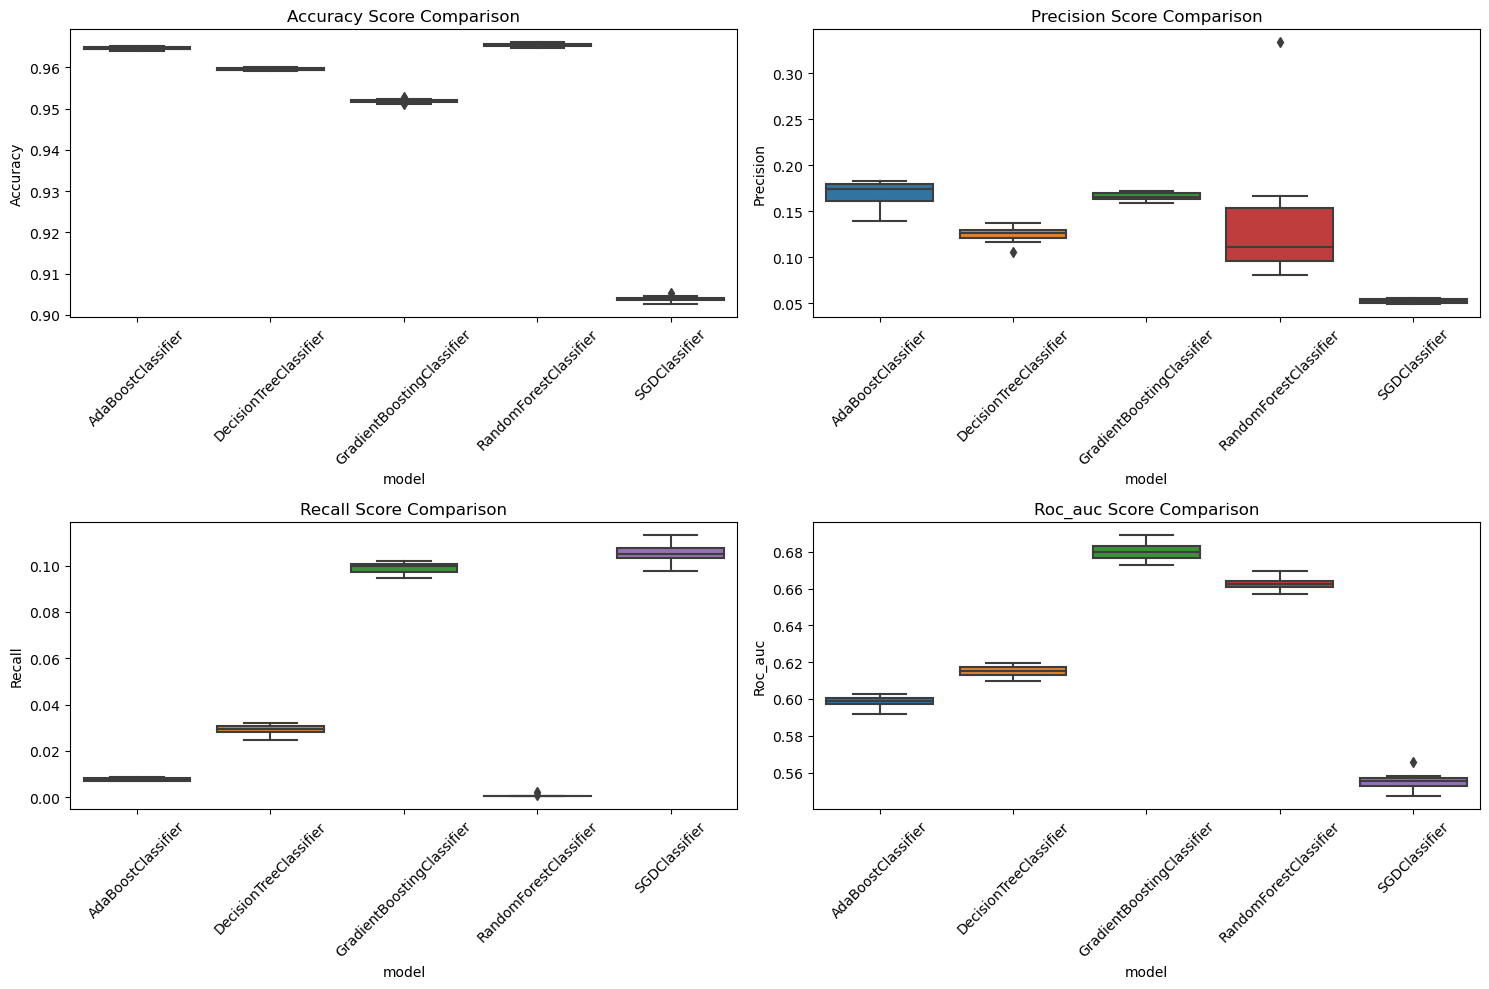

In [7]:
bin_class_utils.plot_model_comparisons(
    best_models, 
    best_thresholds, 
    validation_cap_x_df, 
    validation_y_df
)

In [8]:
del validation_cap_x_df, validation_y_df

#### Select the best model

In [9]:
best_model_name = 'GradientBoostingClassifier'
best_model = best_models[best_model_name]

#### Performance on test set

In [10]:
test_df = general_utils.read_csv(TEST_FILE_PATH)

test_cap_x_df, test_y_df = test_df.drop(columns=TARGET_ATTR), test_df[[TARGET_ATTR]]
del test_df


Read CSV file ../data/test_df.csv into DataFrame:
df.head(): 


,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,...,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d,label
0,1424758,2856,1590,7,133,37,5,12,34,13,...,2,-1,-1,-1,2,3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20...,12,17,1,0
1,1436752,5743,1887,5,112,60,3,19,37,11,...,2,-1,-1,-1,2,5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^...,11,33,1,0
2,1738845,4161,6959,7,207,60,5,17,13,37,...,4,18,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,11,24,4,0
3,1893908,3323,6295,7,110,38,5,19,53,28,...,2,20,-1,-1,5,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,12,30,6,0
4,1610309,4787,4080,5,143,60,3,15,78,23,...,4,18,-1,-1,2,1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^1...,12,24,3,0


df.shape: (209536, 36)


Evaluate the trained estimator performance on test set
Check accuracy score
test set accuracy score: 0.9507530925473427

Check classification report
{'0': {'precision': 0.9679669676110992, 'recall': 0.9814738840091147, 'f1-score': 0.9746736337285644, 'support': 202309.0}, '1': {'precision': 0.14895549500454133, 'recall': 0.09077072090770721, 'f1-score': 0.11280199466941794, 'support': 7227.0}, 'accuracy': 0.9507530925473427, 'macro avg': {'precision': 0.5584612313078203, 'recall': 0.536122302458411, 'f1-score': 0.5437378141989911, 'support': 209536.0}, 'weighted avg': {'precision': 0.9397188579185997, 'recall': 0.9507530925473427, 'f1-score': 0.9449472557530354, 'support': 209536.0}}

Check confusion matrix
test set confusion matrix: 
[[198561   3748]
 [  6571    656]]
True Positives =  198561
True Negatives =  656
False Positives(Type I error) =  3748
False Negatives(Type II error) =  6571

Check cross validation score

accuracy scores: [0.96556743 0.96547116 0.96556661 0.96551889 0.9

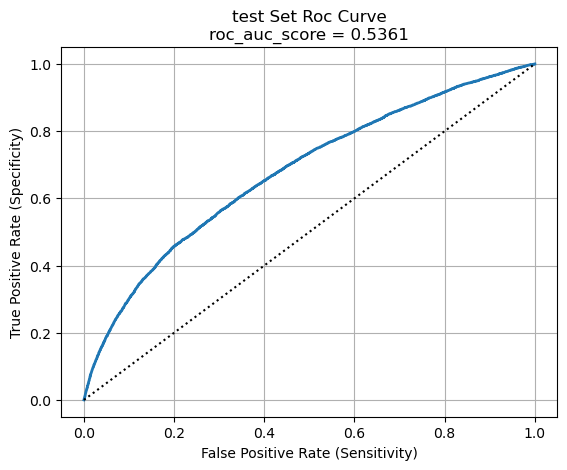


Check Precision-Recall Curve and Average Precision Score


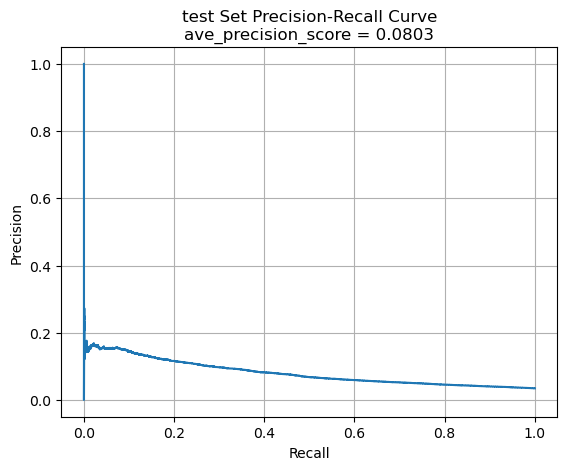

,stage,accuracy,precision,recall,cv_mean_accuracy,cv_mean_precision,cv_mean_recall,cv_mean_f1,roc_auc_score
0,test,0.9508,0.148955,0.090771,0.9655,0.725,0.0019,0.0039,0.5361


In [11]:
bin_class_utils.eval_class(
    test_cap_x_df,
    test_y_df,
    best_model,
    'test',
    CVS_SCORING_LIST,
    best_thresholds[best_model_name]
)

In [12]:
end = time.time()
print(f'Script run time: {(end - start)/60} minutes')

Script run time: 1.8171373724937439 minutes
